In [3]:
# импорт необходимых библиотек
import numpy as np
from plotly.subplots import make_subplots
from tqdm import tqdm
from typing import Union
import plotly.graph_objects as go
from scipy import stats
from math import asin

import scipy.stats as st
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats import proportion
from statsmodels.stats.meta_analysis import effectsize_smd

## Анализ онлайн - магазина Ozon

На основе выбранных продуктов из первого вебинара, выберите 2 A/B-теста и составьте план эксперимента, чтобы избежать Peeking Problem

Распишите, какие метрики и как вы будете анализировать

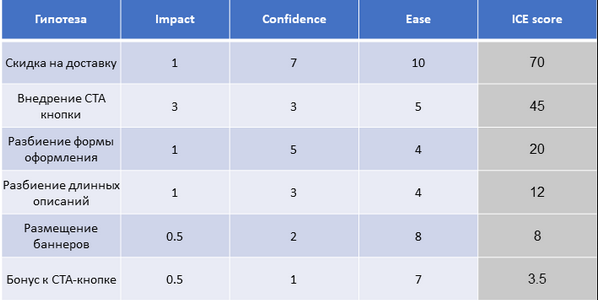

## **Гипотеза №1** 

Скидка на доставку или бесплатная доставка по промокоду увеличит **конверсию** в покупку на 10%, уменьшит **процент брошенных корзин** на 3% и **средний чек** на 5%

### **Что делаем**

Контрольная версия: Не добавляем бесплатную доставку (промокод) в описание над корзиной

Тестовая версия: Добавляем яркий баннер с описанием бесплатной доставки (промокода на бесплатную доставку) над корзиной.

### **На каких пользователях тестируем**
  
На постоянных покупателях, кто совершает не менее 2-х покупок в месяц.

### **Главные метрики**
  
Конверсия в покупку, процент брошенных корзин, процент отказов (на каком этапе)

### **Ожидаемый эффект**
  
рост конверсии в покупку на 10%  // уменьшение процента брошенных корзин на 3% // рост среднего чека на 5%

### **План действий:**
  
Если наш эксперимент будет положительным и мы зафиксируем ожидаемое улучшение в в ключевых метриках и не посадим добавочные, то масштабируем изменение и «выкатываем» его на всех пользователей.
Если основные метрики падают или растут недостаточно, либо добавочные метрики падают, откатываем эксперимент. 


## **Перед стартом.**

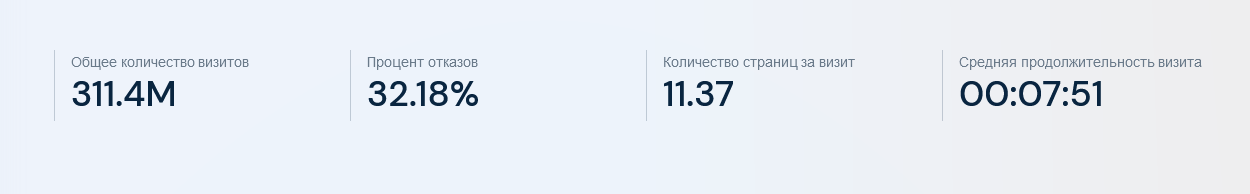

По данным сайта similarweb сайт посетило 311.4 миллиона пользователей (общеий трафик на анализируемый веб-сайт с Январь 2023 до Февраль 2023 на настольных компьютерах и мобильных устройствах).

По данным new-retail база активных покупателей (более 8 заказов в год на пользователя) - 22млн.чел. За 28 дней февраля 785 714 пользователей в день можно считать постоянными покупателями.

Тест запускаем на 10% от постоянных покупателей - на 78 571 пользователях в день.

По данным исследовательского агентства Data Insight  конверсия в российском e-commerce варьируется от 1,3 до 21,7% (в мире от 1-3,8%).

Допустим, что сейчас у нас конверсия в покупку (%CR) для постоянных пользователей равна 12%, мы предполагаем увеличение на 10% до 13,2%

alpha = 5% и beta = 20%


#### Формулы

In [4]:
def calc_proportion_es(prob1: float, prob2: float):
  return abs(proportion_effectsize(prob1, prob2))


def calc_proportion_es_alt(conv1: float, conv2: float, prob1: float, prob2: float):
  return 2 * asin(np.sqrt(conv1/nobs1)) - 2 * asin(np.sqrt(conv2/nobs2))


def calc_continuous_es(mean_control: Union[float, int],
                       std_control: Union[float, int],
                       mean_test: Union[float, int],
                       std_test: Union[float, int]):

  return abs(effectsize_smd(mean_control,
                            std_control,
                            1e4,
                            mean_test,
                            std_test,
                            1e4)[0])


def calc_continuous_es_alt(mean_control: Union[float, int],
                           std_control: Union[float, int],
                           mean_test: Union[float, int],
                           std_test: Union[float, int]):

  effect_size = (mean_test - mean_control) / \
      ((std_control**2 + std_test**2) / 2) ** 0.5
  return effect_size


def calc_sample_size_continuous(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):

  n = tt_ind_solve_power(effect_size=effect_size,
                         alpha=alpha,
                         power=(1 - beta),
                         ratio=ratio,
                         )

  return int(n * 2)


def calc_sample_size_proportion(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):

  n = zt_ind_solve_power(effect_size=effect_size,
                         alpha=alpha,
                         power=(1 - beta),
                         ratio=ratio,
                         )

  return int(n * 2)


In [7]:
# считаем effect_size
bounce_rate_1, bounce_rate_2 = 0.12, 0.132

es_prop = calc_proportion_es(bounce_rate_1, bounce_rate_2)
print(f'effect_size = {es_prop}')


effect_size = 0.03617047252157113


In [8]:
# Рассчитываем размер выборки для проведения теста
print(
    f'Общие кол-во необходимых наблюдений {calc_sample_size_proportion(es_prop)}')


Общие кол-во необходимых наблюдений 23997


In [9]:
# Рассчитываем время для проведения теста
users_average = 23997
print(
    f'Время для проведения теста: {calc_sample_size_proportion(es_prop) / users_average}')


Время для проведения теста: 1.0


## **Гипотеза №2** 

Внедрение СТА кнопки на главный экран увеличит частоту заказов на 3%

### **Что делаем**

Контрольная версия: Не добавляем СТА кнопку на главный экран

Тестовая версия: Добавляем кнопку СТА типа                  
- 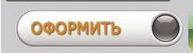

### **На каких пользователях тестируем**
  
На постоянных покупателях, кто совершает не менее 2-х покупок в месяц.

### **Главные метрики**
  
Частота заказов, конверсия в покупку, процент брошенных корзин, процент отказов (на каком этапе)

### **Ожидаемый эффект**
  
рост частоты заказов на 3%  

### **План действий**
  
Если наш эксперимент будет положительным и мы зафиксируем ожидаемое улучшение в в ключевых метриках и не посадим добавочные, то масштабируем изменение и «выкатываем» его на всех пользователей.
Если основные метрики падают или растут недостаточно, либо добавочные метрики падают, откатываем эксперимент. 

По данным сайта similarweb сайт посетило 311.4 миллиона пользователей (общеий трафик на анализируемый веб-сайт с Январь 2023 до Февраль 2023 на настольных компьютерах и мобильных устройствах).

По данным new-retail база активных покупателей (более 8 заказов в год на пользователя) - 22млн.чел. За 28 дней февраля 785 714 пользователей в день можно считать постоянными покупателями.

Тест запускаем на 10% от постоянных покупателей - на **78 571** пользователях в день.

Допустим, что сейчас у нас частота заказов для постоянных пользователей равна 8, мы предполагаем увеличение на 3% до 8,24

alpha = 5% и beta = 20%

In [10]:
# считаем effect_size
bounce_rate_1, bounce_rate_2 = 0.08, 0.0824

es_prop = calc_proportion_es(bounce_rate_1, bounce_rate_2)
print(f'effect_size = {es_prop}')


effect_size = 0.008786865626949858


In [11]:
# Рассчитываем размер выборки для проведения теста
print(
    f'Общие кол-во необходимых наблюдений {calc_sample_size_proportion(es_prop)}')


Общие кол-во необходимых наблюдений 406629


In [15]:
# Рассчитываем время для проведения теста
users_average = 406629
print(
    f'Время для проведения теста: {calc_sample_size_proportion(es_prop) / users_average}')


Время для проведения теста: 1.0
